In [2]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.datasets import load_iris, fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
iris = fetch_openml(name='iris', version=1)
X, y = iris.data, iris.target

y = np.where(y == 'Iris-setosa', -1, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)

X['target'] = y
X = X[X['target'] != 2]
X = X.drop('target', axis=1)
y = y[y != 2]

pca_reduced = PCA(n_components=2)
X_reduced = pca_reduced.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

X = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(X)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)

Accuracy: 1.0
Confusion Matrix:
[[15  0]
 [ 0 18]]


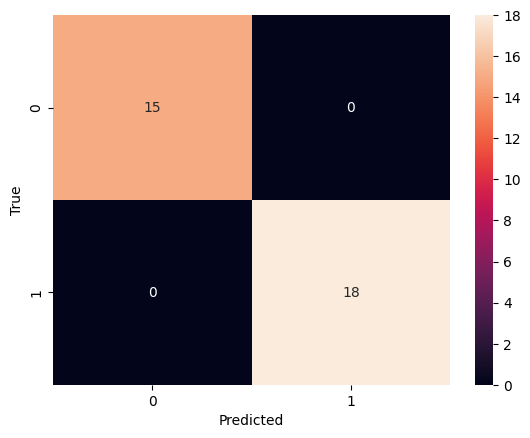

In [5]:
inputs = ParameterVector("input", 2)
weights = ParameterVector("weight", 4)

feature_map = QuantumCircuit(2)
feature_map.ry(inputs[0], 0)
feature_map.ry(inputs[1], 1)
feature_map.cx(0, 1)

ansatz = QuantumCircuit(2)
ansatz.ry(weights[0], 0)
ansatz.ry(weights[1], 1)
ansatz.cx(0, 1)
ansatz.ry(weights[2], 0)
ansatz.ry(weights[3], 1)

vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=100),
)

vqc.fit(X_train, y_train)
y_pred = vqc.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Accuracy: 1.0


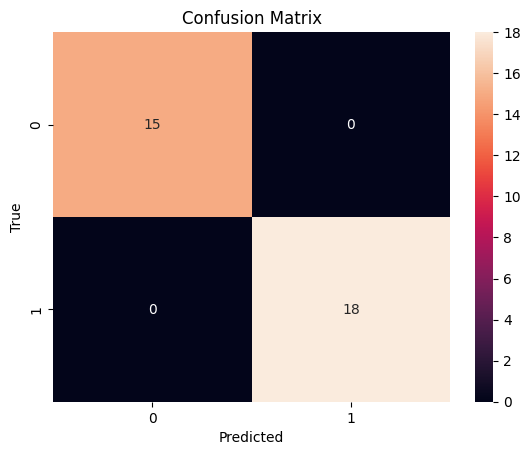

In [6]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()